In [2]:
import json
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

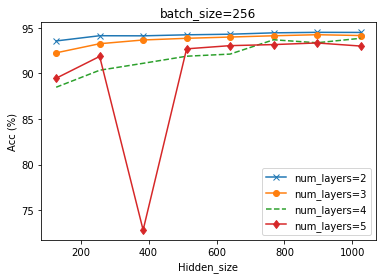

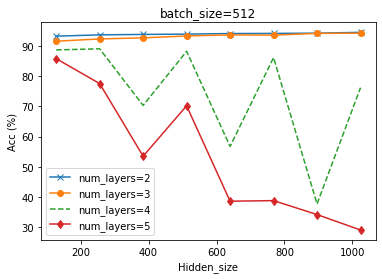

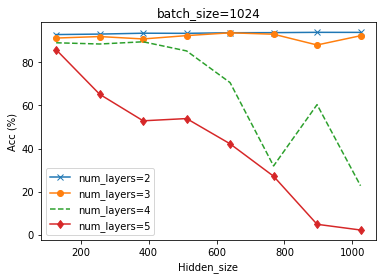

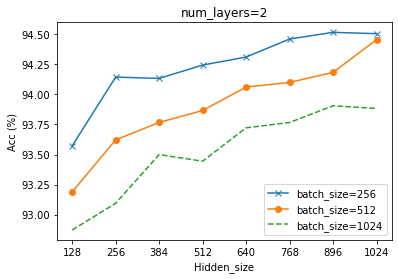

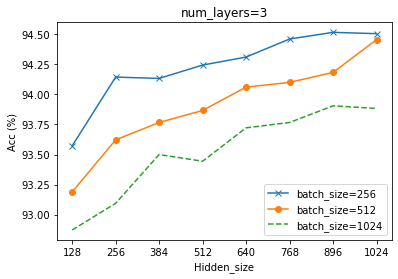

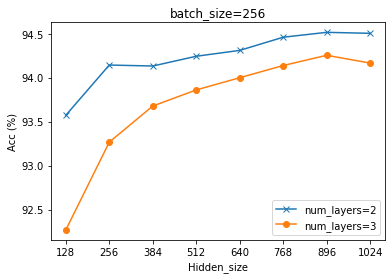

In [4]:
data=json.loads(Path("train1.json").read_text() )
d={}
for i in range(len(data)):
    tmp=data[i]['params']
    tmp['acc']=data[i]['acc']
    d[str(i)]=tmp
df = pd.DataFrame(list(d.values()))
style=['-x','-o','--','-d']
for batch_size in [256,512,1024]:
    fig, ax = plt.subplots()
    _df = df.loc[df['batch_size']==batch_size]
    for n in range(4):
        ax.plot(_df.loc[_df['num_layers']==n+2]['hidden_size'],_df.loc[_df['num_layers']==n+2]['acc'],style[n],label=f"num_layers={n+2:d}")
    ax.legend(prop={'size':10})
    plt.title(f"batch_size={batch_size}")
    plt.xlabel('Hidden_size')
    plt.ylabel('Acc (%)')
    plt.savefig(f"{batch_size}.png")

for n in [2,3]:
    dd=df.loc[df['num_layers']==2]
    style=iter(['-x','-o','--','-d'])
    fig, ax = plt.subplots()
    for batch_size in [256,512,1024]: 
        ax.plot(dd.loc[dd['batch_size']==batch_size]['hidden_size'],dd.loc[dd['batch_size']==batch_size]['acc'],next(style),label=f"batch_size={batch_size}")
    ax.legend(prop={'size':10})
    plt.title(f"num_layers={n}")
    plt.xlabel('Hidden_size')
    plt.ylabel('Acc (%)')
    plt.xticks(dd.loc[dd['batch_size']==batch_size]['hidden_size'].tolist())
    plt.savefig(f"{n}.png")
    
dd=df.loc[df['batch_size']==256]
style=iter(['-x','-o','--','-d'])
fig, ax = plt.subplots()
for n in [2,3]:
    ax.plot(dd.loc[dd['num_layers']==n]['hidden_size'],dd.loc[dd['num_layers']==n]['acc'],next(style),label=f"num_layers={n}")
ax.legend(loc=4,prop={'size':10})
plt.title(f"batch_size={256}")
plt.xlabel('Hidden_size')
plt.ylabel('Acc (%)')
plt.xticks(dd.loc[dd['num_layers']==2]['hidden_size'].tolist())
plt.savefig(f"250_compare.png")

([<matplotlib.axis.XTick at 0x20c9097b190>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

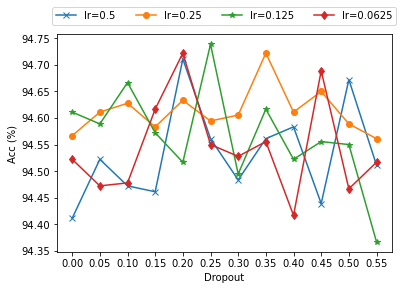

In [33]:
data=json.loads(Path("train2.json").read_text() )

d={}
for i in range(len(data)):
    tmp=data[i]['params']
    tmp['acc']=data[i]['acc']
    d[str(i)]=tmp
df = pd.DataFrame(list(d.values()))

fig, ax = plt.subplots()
style=iter(['-x','-o','-*','-d','-v'])
for lr in df.loc[df['lr']<1].lr.unique().tolist():
    dd=df.loc[df['lr']<1].loc[df['lr']==lr]
    ax.plot(dd['dropout'],dd['acc'],next(style),label=f"lr={lr}")
plt.xlabel('Dropout')
plt.ylabel('Acc (%)')
ax.legend(loc='upper center',prop={'size':10},ncol = 5,bbox_to_anchor=(0.5, 1.15))
plt.xticks(dd.dropout.unique().tolist())